https://medium.com/@Rehan_Sayyad/how-to-use-convolutional-neural-networks-for-time-series-classification-80575131a474

https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [9]:
import sys
import os
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('../..'))

sys.path.insert(1, module_path + '/src')
import audio_time_series_classification as preproject
import utility

sys.path.insert(1, module_path + '/src/models/')
import helper

from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.utils.data_processing import from_nested_to_2d_array
import matplotlib.pyplot as plt
from sklearn import preprocessing
import keras.utils as np_utils
from sktime.classification.dictionary_based import ContractableBOSS
import pickle

from sklearn.metrics import classification_report
from time import time

figure_path = module_path + '/figures/'

In [6]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_VAL.ts')


labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['crackle' 'normal' 'wheeze'] [438 418 431]


In [7]:
start = time()

cboss = ContractableBOSS(
    n_parameter_samples=50, max_ensemble_size=10, random_state=0
)
cboss.fit(X_train, y_train)

y_pred = cboss.predict(X_test)

print(f'Time utilized = {time() - start}')

Time utilized = 3323.5873975753784


              precision    recall  f1-score   support

     crackle       0.47      0.57      0.51       111
      normal       0.41      0.44      0.42       105
      wheeze       0.44      0.34      0.38       128

    accuracy                           0.44       344
   macro avg       0.44      0.45      0.44       344
weighted avg       0.44      0.44      0.44       344



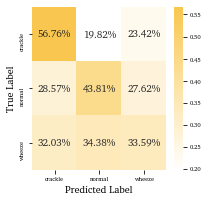

In [10]:
figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 4)

f.savefig(figure_path + f'cm_simpleCBOSS_3class.pdf', bbox_inches='tight')


print(classification_report(y_test, y_pred))

## 2 classes

In [11]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_VAL.ts')


labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['crackle' 'wheeze'] [426 441]


In [12]:
start = time()

cboss = ContractableBOSS(
    n_parameter_samples=50, max_ensemble_size=10, random_state=0
)
cboss.fit(X_train, y_train)

y_pred = cboss.predict(X_test)

print(f'Time utilized = {time() - start}')

Time utilized = 1705.2695558071136


              precision    recall  f1-score   support

     crackle       0.66      0.68      0.67       123
      wheeze       0.65      0.62      0.63       114

    accuracy                           0.65       237
   macro avg       0.65      0.65      0.65       237
weighted avg       0.65      0.65      0.65       237



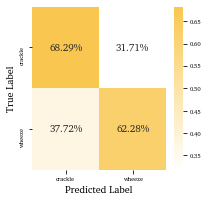

In [13]:
figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 4)

f.savefig(figure_path + f'cm_simpleCBOSS_2class.pdf', bbox_inches='tight')


print(classification_report(y_test, y_pred))